[1 2 3 0]
[1.51495756e+17-2.38822567j 5.68664294e+16+0.81750966j
 8.66002912e+16+5.51058325j 1.17256540e+17+0.06013276j]
[ 12 167]
MUSIC DoAs: [0.21060956 2.93098309] 



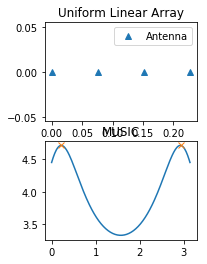

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as LA
import scipy.signal as ss
from scipy.io import wavfile
import operator

# Functions
def array_response_vector(array,theta):
    N = array.shape
    v = np.exp(1j*2*np.pi*array*np.sin(theta))
    return v/np.sqrt(N)

def music(CovMat,L,N,array,Angles):
    # CovMat is the signal covariance matrix, L is the number of sources, N is the number of antennas
    # array holds the positions of antenna elements
    # Angles are the grid of directions in the azimuth angular domain
    D,V = LA.eig(CovMat)
    idx = D.argsort()
    print(idx)
    lmbd = D[idx]
    print(D)
    V = V[:, idx]
    Qn  = V[:,L:N]
    numAngles = Angles.size
    pspectrum = np.zeros(numAngles)
    for i in range(numAngles):
        av = array_response_vector(array,Angles[i])
        pspectrum[i] = 1/LA.norm((Qn.conj().transpose()@av))
        
    psindB    = np.log10(10*pspectrum/pspectrum.min())
    DoAsMUSIC,_= ss.find_peaks(psindB,height=0, distance=1.2)
    print(DoAsMUSIC)
    return DoAsMUSIC,pspectrum

#=============================================================

L = 2  # number of sources
N = 4  # number of ULA elements 
dist = 0.2272

array = np.linspace(0,dist,N)

plt.figure()
plt.subplot(221)
plt.plot(array,np.zeros(N),'^')
plt.title('Uniform Linear Array')
plt.legend(['Antenna'])


Angles = np.linspace(0,np.pi,180)
numAngles = Angles.size


x = np.arange(0,220160,1)
fs1, data1 = wavfile.read('./data_35_140.wav')

#data1 = filteredData

data_extracted = np.take(data1, x)
data_extracted = np.fft.fft(data_extracted)
#data_extracted = np.fft.ifft(data_extracted)

data1 = data_extracted[0::4]
data2 = data_extracted[1::4]
data3 = data_extracted[2::4]
data4 = data_extracted[3::4]


x = np.asmatrix([data1,data2,data3,data4])
CovMat = x@x.conj().transpose()
DoAsMUSIC, psindB = music(CovMat,L,N,array,Angles)


plt.subplot(223)
plt.plot(Angles,psindB)
plt.plot(Angles[DoAsMUSIC],psindB[DoAsMUSIC],'x')
plt.title('MUSIC')


print('MUSIC DoAs:',np.sort(Angles[DoAsMUSIC]),'\n')


plt.show()